<a href="https://colab.research.google.com/github/ngotancuong/mse.dip/blob/main/Quiz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Convert the objects’ color as follows:
- The square to red, the rectangle to green, the pentagon to blue, the circle to magenta and the star to cyan.

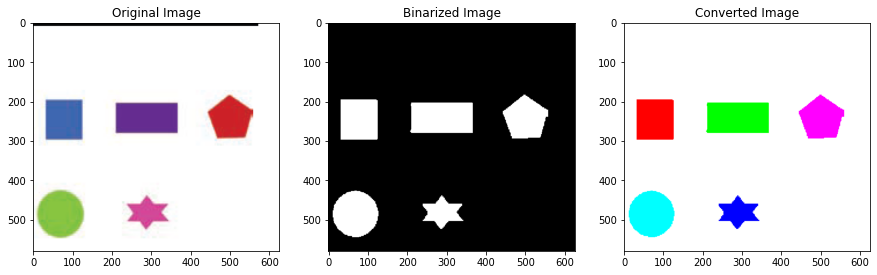

In [ ]:
import urllib.request
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.color import label2rgb


# Load the image from the URL
url = 'https://raw.githubusercontent.com/vn-anhnth/MSE-11HCM/main/images/shapes.png'
with urllib.request.urlopen(url) as url_response:
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    img = cv2.imdecode(img_array, -1)

# convert to grayscale
GrayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
GrayImg[0:20, :] = 255

# binarize image
level, bwImg = cv2.threshold(GrayImg, 0, 1, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# convert colors
num_labels, L, stats, centroids = cv2.connectedComponentsWithStats(np.uint8(bwImg), connectivity=8)

# create colormap for labeled image
lut = np.zeros((np.max(L) + 1, 3))
lut[1, :] = [255, 0, 255]  # magenta
lut[2, :] = [255, 0, 0]    # red
lut[3, :] = [0, 255, 0]    # green
lut[4, :] = [0, 255, 255]  # cyan
lut[5, :] = [0, 0, 255]    # blue

rgblabel = np.zeros((L.shape[0], L.shape[1], 3), dtype=np.uint8)
mask = np.all(rgblabel == [0, 0, 0], axis=-1)
rgblabel[mask] = [255, 255, 255]
for i in range(L.shape[0]):
    for j in range(L.shape[1]):
        rgblabel[i, j, :] = lut[L[i, j], :]

# Replace black pixels with white pixels
rgblabel[np.all(rgblabel == [0, 0, 0], axis=-1)] = [255, 255, 255]

# ignore small objects
minpolysize = 2000
for i in range(1, num_labels):
    if stats[i][cv2.CC_STAT_AREA] < minpolysize:
        bwImg[L == i] = 0

# show images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(bwImg, cmap='gray')
axs[1].set_title('Binarized Image')
axs[2].imshow(rgblabel)
axs[2].set_title('Converted Image')
plt.show()

### 2.
- (a) Convert the original image to binary and display the result.
- (b) Use erosion and/or dilation to draw the edge of the objects. You can
choose any structuring element to apply.
- (c) Generate a structuring element as below. Could we count the number
of coins using this structuring element?

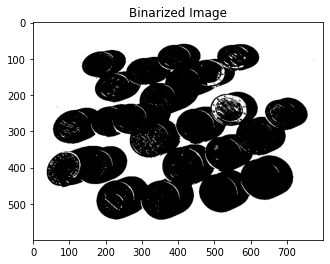

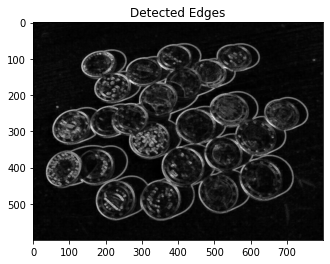

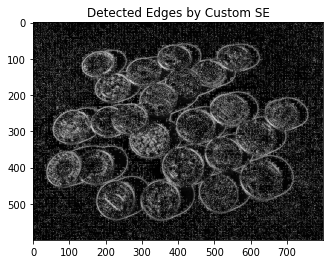

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image from the URL
url = 'https://raw.githubusercontent.com/vn-anhnth/MSE-11HCM/main/images/coins.jpg'
with urllib.request.urlopen(url) as url_response:
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    img = cv2.imdecode(img_array, -1)

# a. binarize image
_, bw_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(bw_img, cmap='gray')
plt.title('Binarized Image')
plt.show()

# b. choose any structuring element
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
img_dilated = cv2.dilate(img, se)
img_eroded = cv2.erode(img, se)
edge1 = img_dilated - img
edge2 = img - img_eroded
edge3 = cv2.bitwise_or(edge1, edge2)
plt.imshow(edge3, cmap='gray')
plt.title('Detected Edges')
plt.show()

# c. create your own structuring element
se1 = np.array([[0, 1, 1, 0], [1, 0, 0, 1], [1, 0, 0, 1], [0, 1, 1, 0]], dtype=np.uint8)
img_dilated = cv2.dilate(img, se1)
img_eroded = cv2.erode(img, se1)
edge1 = img_dilated - img
edge2 = img - img_eroded
edge3 = cv2.bitwise_or(edge1, edge2)
plt.imshow(edge3, cmap='gray')
plt.title('Detected Edges by Custom SE')
plt.show()
